# Relatorio EP2


## Integrantes:
### Caio Andrade - 9797232
### Caio Fontes - 10692061
### Leandro Rodrigues - 10723944
### Thiago Teixeira - 10736987

## Introdução

   Neste relatório examinamos três formas de movimento 2D: o Movimento de um Pêndulo Simples, O Movimento Circular em Plano Horizontal e .Tentaremos estimar, a partir do nosso conhecimento prévio sobre as caracteristicas desses movimentos, equações que modelem os dados experimentais adequadamente.
   
   Os experimentos foram realizados no laboratório de demonstrações no Instituto de Física, da seguinte maneira : Para o Pendulo, prendemos o celular na haste de um pêndulo no , e medimos sua aceleração por meio do acelerometro. Para o Plano Horizontal, prendemos uma haste de metal a uma cadeira giratória , com o celular amarrado a ponta, e medimos o tempo a cada meia volta. 
   
   Todas as medidas relevantes foram tomadas e serão apresentadas nas respectivas seções. Cada medição foi realizada repetidas, vezes como exigido no enunciado.

In [61]:
#Bibliotecas utilizadas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import math

Abaixo estão as funções que foram utilizadas para plotar os dados simulados pelo método de euler

In [89]:
# Funções utilizadas para Euler

def initState(x0, v0, t0):
    ## Funçao que retorna um estado inicial contendo a posição,
    # velocidade e tempo inicial, contidos num array numpy
    
    S = np.array([x0, v0, t0])
    return S

def rate(S, a, dt):
    ## Retorna um np.array contendo a taxa de variação do espaço
    #(v, ou seja, s[1]), velocidade (aceleração) 
    # e tempo (que é constante e vale 1)
    
    R = np.array([S[1], a, 1])
    return R

def nextState(S, a, dt):
    # Recebe um estado S e retorna o proximo estado Sn
    Sn = S + rate(S, a, dt)*dt
    return Sn
    

# Pendulo Simples


## Método

   Para esse experimento, utilizamos um pêndulo já presente no laboratório. O celular foi preso na parte final no pêndulo de maneira a ficar alinhado verticalmente com a haste. As medições foram feitas ao se levantar o pêndulo em uma angulação  pré-determinada (10 graus) do repouso, que foi medida com *INSTRUMENTO DE MEDIÇÃO DE ANGULO*.
  
  Esperamos 5 segundos com o pêndulo parado na posição inclinada especial para termos uma base de comparação, soltamos o celular e deixamos o pêndulo realizar 5 oscilações, depois das quais pausamos o movimento no ponto mais baixo da oscilação, sem angulação da haste.
  
  Uma pessoa segurava o celular na posição inicial e o soltava, enquanto outra manuseava o celular e uma outra filmava o experimento.
  
  O experimento foi realizado 5 vezes, para eliminar inconsistências.

## Dados

Dados obtidos pelo celular:

In [63]:
names =[]
for file in glob.glob("pendulo/*.csv"):   #armazena o titulo de cada arquivo em uma lista
    names.append(file)

names.sort()

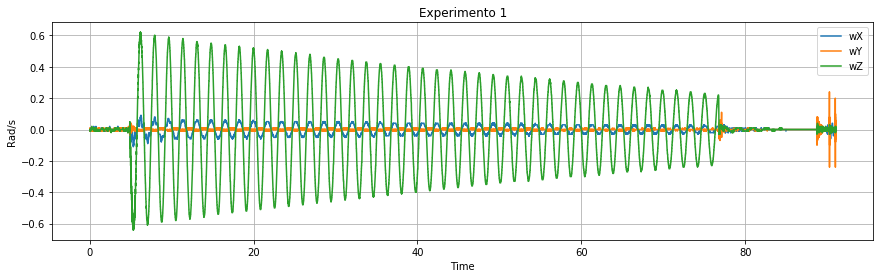

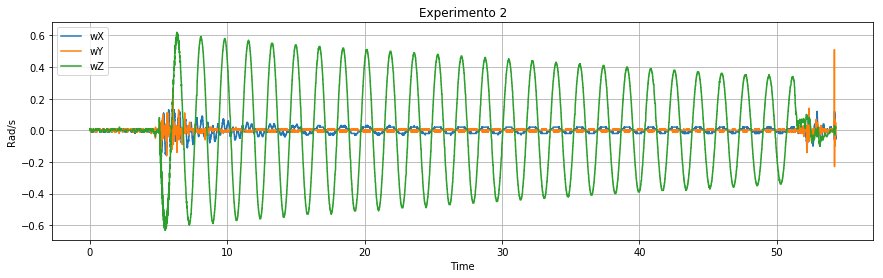

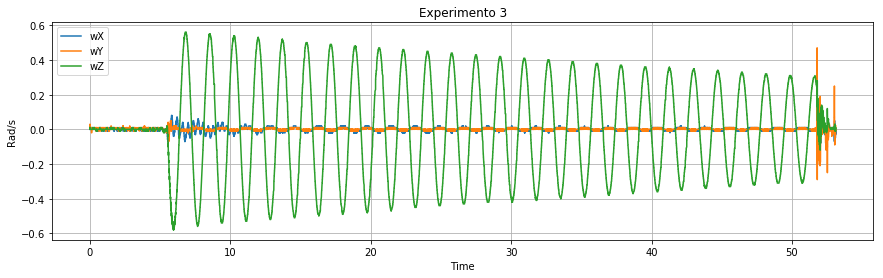

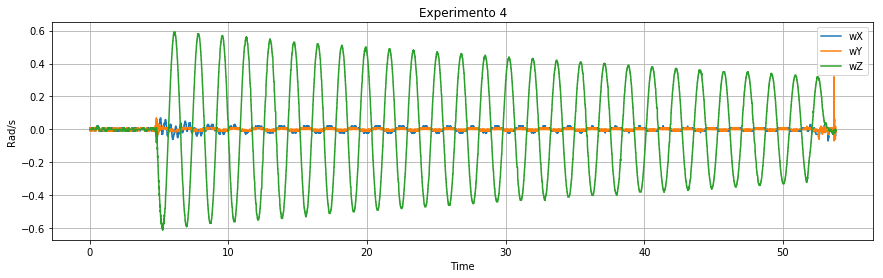

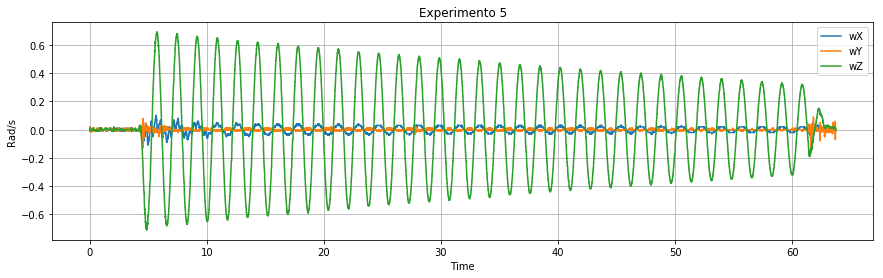

In [64]:
#Plots
for i in range(len(names)):
    tbl = pd.read_csv(names[i])
    tbl.head()
    fig = plt.figure(figsize=(50,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Rad/s")
    plt.plot(tbl["time"], tbl["wx"], label = "wX")
    plt.plot(tbl["time"], tbl["wy"], label ="wY")
    plt.plot(tbl["time"], tbl["wz"], label ="wZ")
    plt.title("Experimento "+str(i+1))    
    plt.legend()
    plt.show()

## Análise

Podemos observar que a velocidade angular medida no eixo Z (representada pela linha verde nos gráficos acima) apresenta o comportamento esperado se considerarmos esse como o eio principal do movimento pendular. Podemos observar o comportamento da velocidade média do pêndulo nesse eixo . Abaixo estão os gráficos sobrepostos. 

         time    wx    wy    wz
0       0.003  0.00 -0.00  0.01
1       0.004  0.00  0.00  0.01
2       0.004  0.01  0.00  0.01
3       0.004  0.01  0.01  0.00
4       0.004  0.01  0.01  0.00
5       0.004  0.01  0.01  0.00
6       0.004  0.01  0.00  0.00
7       0.006  0.01  0.00  0.00
8       0.011  0.01  0.00  0.00
9       0.011  0.01  0.00  0.00
10      0.013  0.01  0.01  0.01
11      0.017  0.01  0.00  0.01
12      0.019  0.01  0.00  0.01
13      0.023  0.00 -0.00  0.01
14      0.024  0.00 -0.00  0.01
15      0.027 -0.00 -0.00  0.01
16      0.029  0.00 -0.00  0.01
17      0.031  0.00  0.00  0.01
18      0.034  0.01  0.00  0.01
19      0.036  0.01  0.00  0.01
20      0.040  0.01  0.00  0.01
21      0.041  0.01  0.00  0.01
22      0.043  0.01 -0.00  0.01
23      0.046  0.01 -0.00  0.01
24      0.048  0.01 -0.00  0.01
25      0.051  0.01 -0.00  0.01
26      0.053  0.01  0.00  0.01
27      0.056  0.01  0.00  0.01
28      0.059  0.01  0.00  0.01
29      0.061  0.01  0.00  0.01
...     

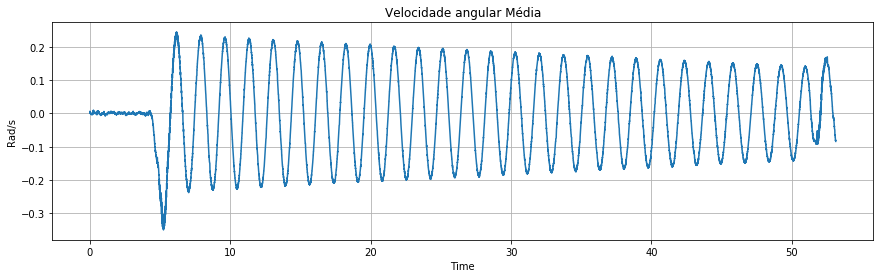

In [65]:
#leitura dos arquivos
tbls = []
for i in range(len(names)):
    tbls.append(pd.read_csv(names[i]))

tam = min(len(tbls[0]["time"]),
          len(tbls[1]["time"]),
          len(tbls[2]["time"]),
          len(tbls[3]["time"]),
          len(tbls[4]["time"]));

for t in tbls:
    t["wz"] = t["wz"][:tam]
    
#Calcula as médias
wmed = (tbls[0]["wz"] + tbls[1]["wz"] + tbls[2]["wz"] + tbls[3]["wz"] + tbls[4]["wz"])/5

wmed = wmed[:tam]
x = tbls[0]["time"][:tam]

#Plot
tmed.head()
fig = plt.figure(figsize=(50,4))
plt.subplot(131)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Rad/s")
plt.plot(x, wmed)
plt.title("Velocidade angular Média")
plt.show()

Podemos observar que o módulo da Velocidade angular no sinal médio oscila entre extremos menores do que os encontrados nos experimentos individualmente. Isso se deve ao fato de que pequenas variações nas condições iniciais do experimento (como por exemplo no ângulo inicial exato, inclinação em relação ao eixo de movimento, etc) vão se acumulando com as oscilações, gerando diferenças grandes ao final do experimento. Esse comportamento pode ser visto no gŕafico dos sinais sobrepostos abaixo:

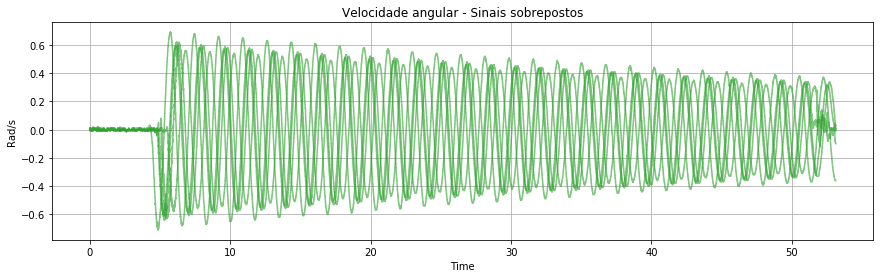

In [66]:
fig = plt.figure(figsize=(50,4))
plt.subplot(131)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Rad/s")
plt.plot(x, tbls[0]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, tbls[1]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, tbls[2]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, tbls[3]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, tbls[4]["wz"][:tam], "C2", alpha = 0.6)
plt.title("Velocidade angular - Sinais sobrepostos")
plt.show()

Alguns experimentos também possuem poluição nos dados nos últimos segundos de movimento, o que gera o pico observado no gráfico da Velocidade Angular média.

## Simulação


# Movimento Circular em Plano Horizontal


## Método

Para esse experimento, utilizamos um banco que girava em sua própria base,já presente no laboratório. Uma haste de metal foi presa ao banco, que funcionava como uma extensão do seu raio, e o celular foi preso à ponta dessa haste. Isso foi feito para que a velocidade angular tivesse um módulo maior, e portanto suas variações fossem captadas mais fácilmente. 

As medições foram feitas ao se colocar o "braço" da cadeira sobre uma marca no chão delimitando a posição inicial, se aplicava uma força inicial que iniciava o movimento. Outra marca no chão delimitava "meia volta" a partir da primeira marca, e pessoas nessas duas marcações cronometravam quando o braço passava por essas marcas.

Esperamos 5 segundos com o braço parado na posição inclinada especial para termos uma base de comparação, e deixamos o celular concluir 3 rotações antes de interromper o movimento.

Para que a força inicial fosse sempre a mesma, amarramos um elástico em outro banco, que ficava a uma distância fixa do ponto inicial do celular, e aplicava uma força perpendicular a haste, no mesmo plano do movimento.

Uma pessoa segurava o celular na posição inicial e o soltava, enquanto outra manuseava o elástico e marcava a posição inicial, uma outra marcava a outra posição e uma outra filmava o experimento.

O experimento foi realizado 5 vezes, para eliminar inconsistências.



## Dados

Dados obtidos pelo celular:

In [67]:
names = []
tbls = []
for file in glob.glob("circular/*.csv"):   #armazena o titulo de cada arquivo em uma lista
    names.append(file)

names.sort()

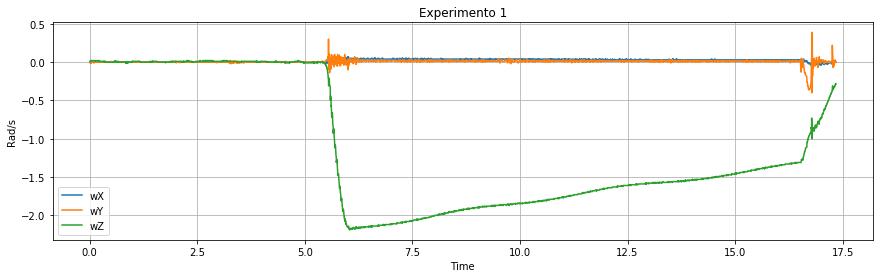

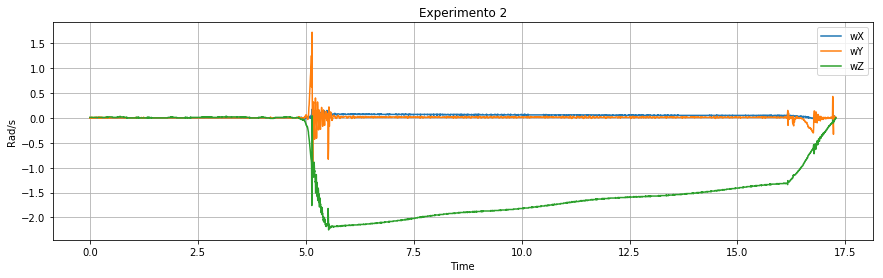

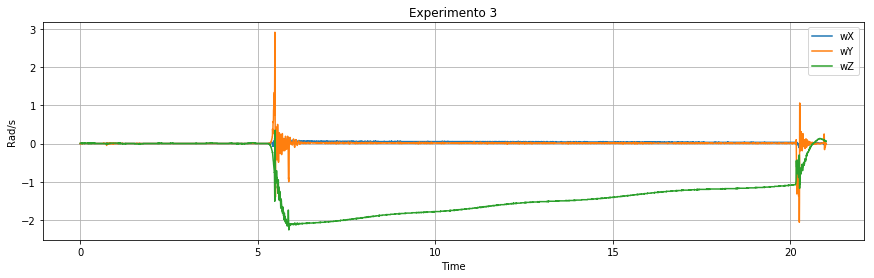

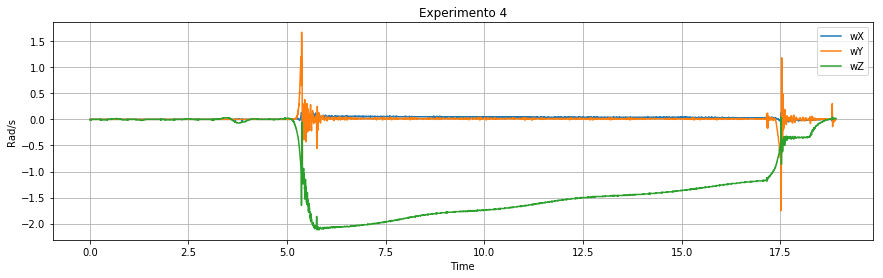

In [68]:
eulerCircular = []
for i in range(len(names)):
    tbl = pd.read_csv(names[i])
    tbls.append(tbl)
    eulerCircular.append(tbl)
    tbl.head()
    fig = plt.figure(figsize=(50,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Rad/s")
    plt.plot(tbl["time"], tbl["wx"], label = "wX")
    plt.plot(tbl["time"], tbl["wy"], label ="wY")
    plt.plot(tbl["time"], tbl["wz"], label ="wZ")
    plt.title("Experimento "+str(i+1))
    plt.legend()
    plt.show()

## Análise

Em todos os experimentos podemos observar o comportamento esperado da velocidade angular na componente wZ, que se encontra com valores negativos devido a orientação do movimento, no entanto conseguimos observar o momento do impulso dado pelo elástico e o decréscimo gradual da velocidade devido à resistência do ar.


Podemos observar essa têndencia também nos gráficos que mostram a velocidade média em cada momento e no gráfico dos sinais sobrepostos.

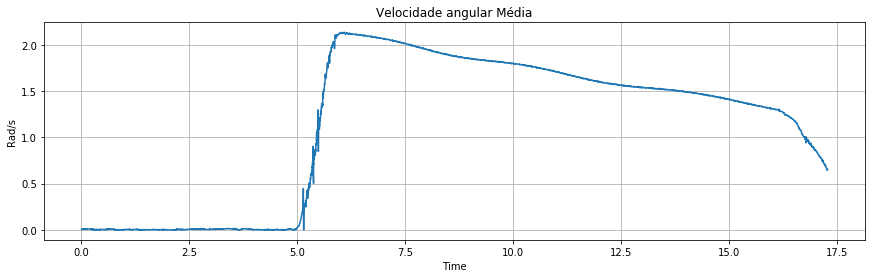

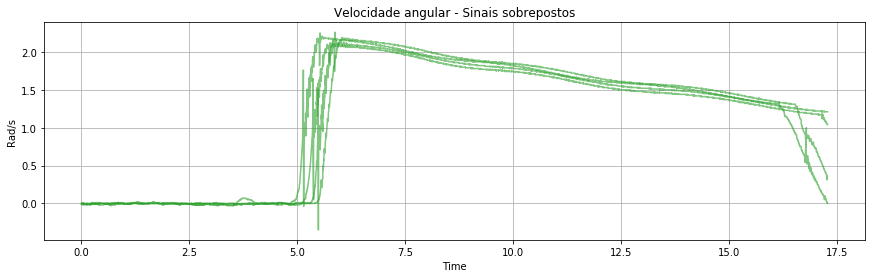

In [69]:
tam = min(len(tbls[0]["time"]),
          len(tbls[1]["time"]),
          len(tbls[2]["time"]),
          len(tbls[3]["time"]));

for t in tbls:
    t["wz"] = t["wz"][:tam]
    
#Calcula o módulo das médias
wmed = abs(tbls[0]["wz"] + tbls[1]["wz"] + tbls[2]["wz"] + tbls[3]["wz"])/4

wmed = wmed[:tam]
x = tbls[0]["time"][:tam]

#Plot Velocidade média
tmed.head()
fig = plt.figure(figsize=(50,4))
plt.subplot(131)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Rad/s")
plt.plot(x, wmed)
plt.title("Velocidade angular Média")
plt.show()


#Plot Sinais Sobrepostos
fig = plt.figure(figsize=(50,4))
plt.subplot(131)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Rad/s")
plt.plot(x, -tbls[0]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, -tbls[1]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, -tbls[2]["wz"][:tam], "C2", alpha = 0.6)
plt.plot(x, -tbls[3]["wz"][:tam], "C2", alpha = 0.6)
plt.title("Velocidade angular - Sinais sobrepostos")
plt.show()

## Simulação

Pelos dados do experimento, podemos estimar a velocidade angular inicial - em média - como 2 rad/s

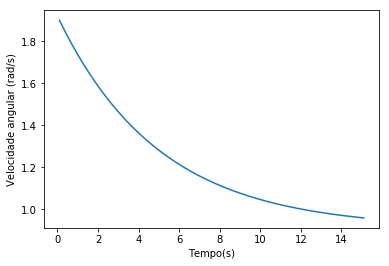

In [188]:
def acc(t, alpha):
    return -alpha*math.exp(-alpha*t)

v0 = 2
t0 = 0
theta0 = 0
dt = 0.1
a = -math.exp(0) # EDO
vval = []
tval = []
alpha = 0.2


S = initState(theta0, v0, t0)
tf = 15 #15segundos
while(S[2] < tf):
    S = nextState(S, a, dt)
    a = acc(S[2],alpha)
    vval.append(S[1])
    tval.append(S[2])

    
plt.plot(tval, vval)
plt.xlabel("Tempo(s)")
plt.ylabel("Velocidade angular (rad/s)")
plt.show()

# Descida em uma Rampa

## Método

Para esse experimento, utilizamos uma tábua que encontramos no laboratório. Elevamos uma de suas pontas criando uma rampa com o chão. Prendemos o celular a um carrinho encontrado no laboratório e o soltamos do ínicio da rampa. 

Marcamos a rampa em 3 posições, e duas pessoas marcavam o tempo que levava para a roda traseira do carrinho passava por cada uma das marcas.

Esperamos 5 segundos antes de soltar o carrinho para termos uma base de comparação, e tentamos interromper o movimento logo após o carrinho chegar ao final da rampa.

O experimento foi realizado 10 vezes para eliminar inconsistências.

## Dados

Medimos os dados utilizando o acelerometro do aplicativo

In [70]:
names = []
tbls = []
euler_tbls = []
for file in glob.glob("carrinho/*.csv"):   #armazena o titulo de cada arquivo em uma lista
    names.append(file)
names.sort()

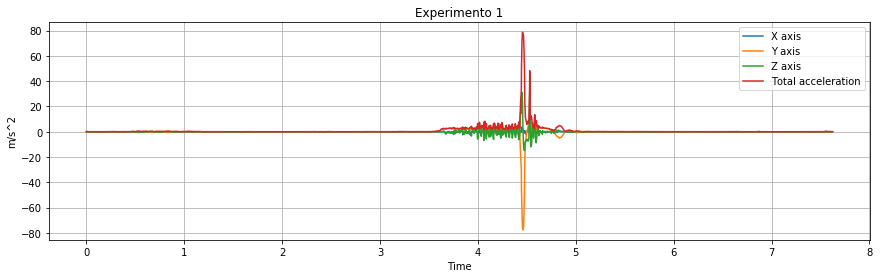

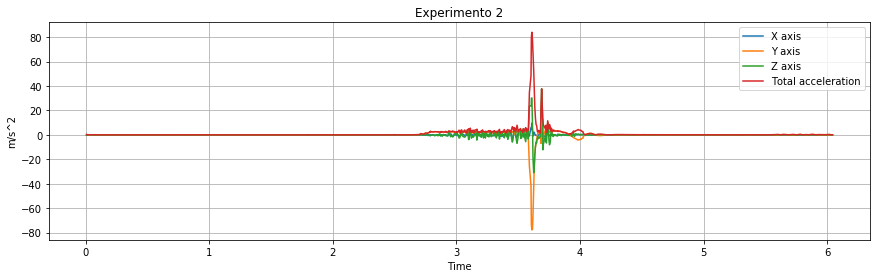

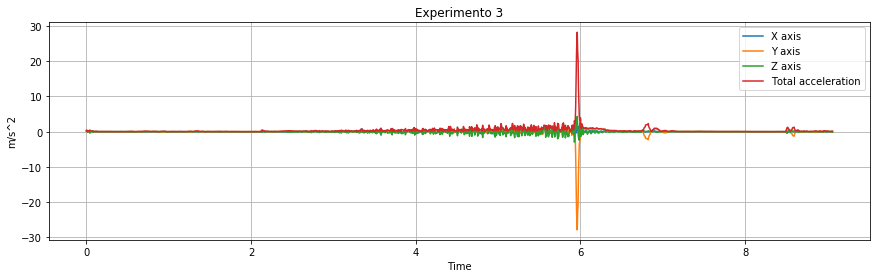

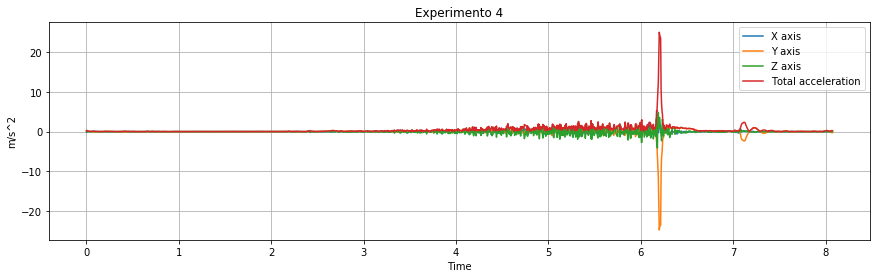

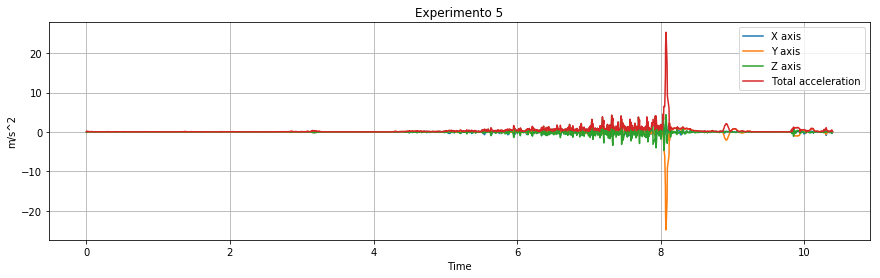

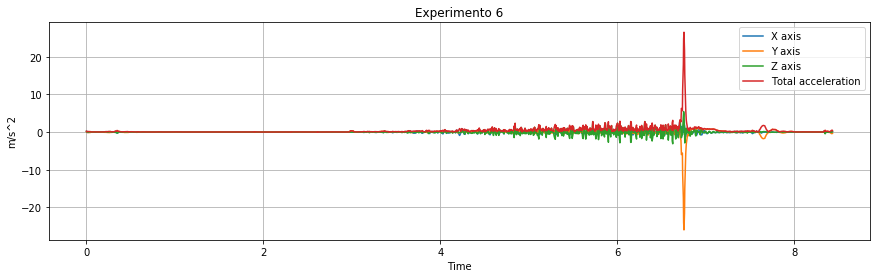

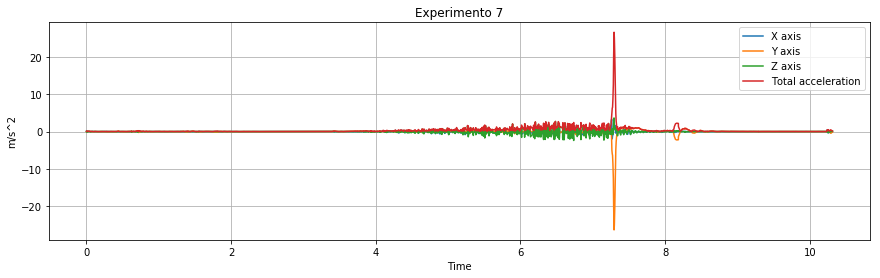

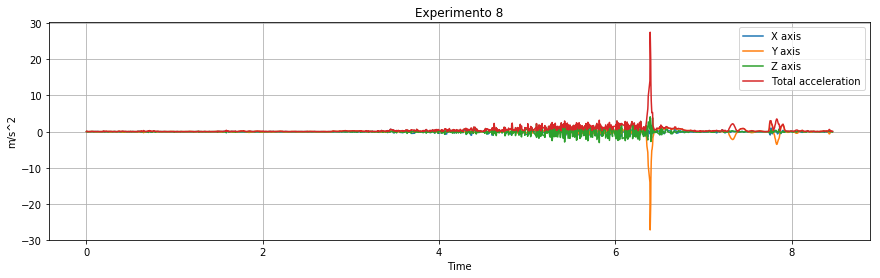

In [74]:
for i in range(len(names)):
    tbl = pd.read_csv(names[i])
    tbls.append(tbl)
    euler_tbls.append(tbl)
    tbl.head()
    fig = plt.figure(figsize=(50,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("m/s^2")
    plt.plot(tbl["time"], tbl["ax"], label = "X axis")
    plt.plot(tbl["time"], tbl["ay"], label ="Y axis")
    plt.plot(tbl["time"], tbl["az"], label ="Z axis")
    plt.plot(tbl["time"], tbl["aT"], label = "Total acceleration")
    plt.title("Experimento "+str(i+1))
    plt.legend()
    plt.show()

Fazendo a plotagem dos dados da velocidade por meio de euler

## Análise

Em todos os experimentos existe um pico no valor da aceleração total devido a parada do carrinho, isso foi um problema encontrado na realização dos experimentos, devido ao espaço limitado do laboratório. Eliminando esse ruído dos dados temos:

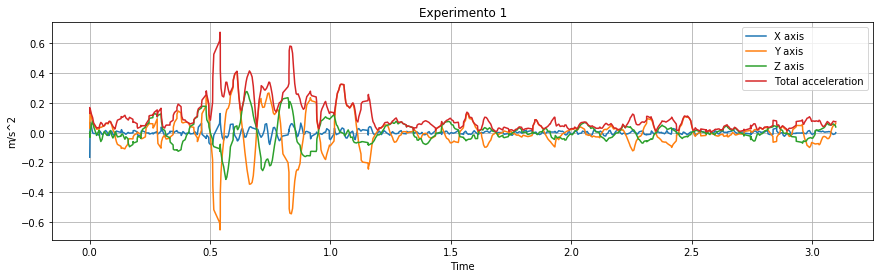

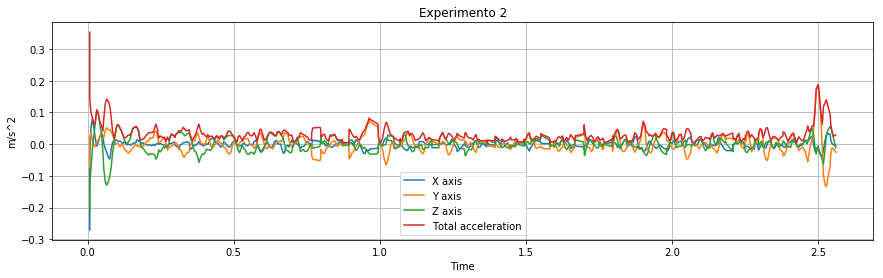

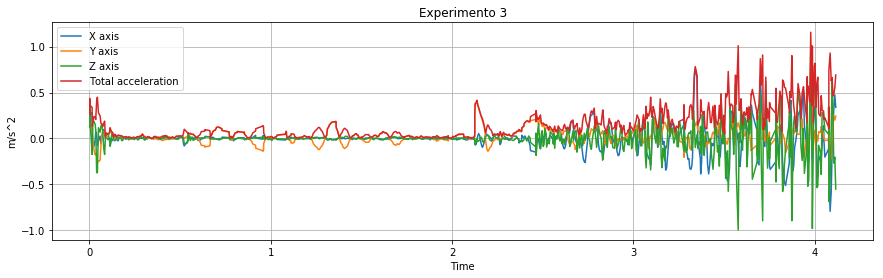

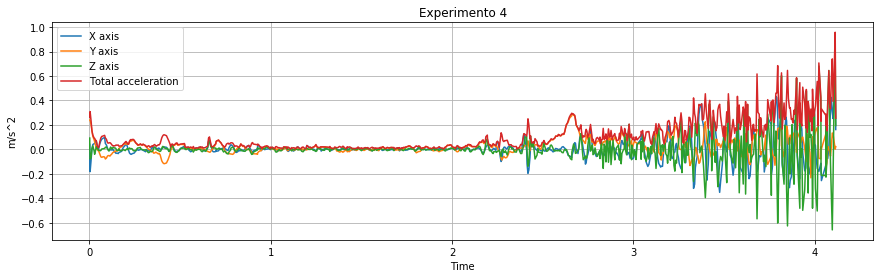

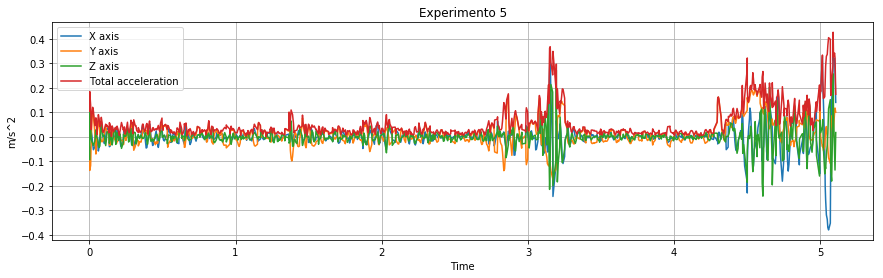

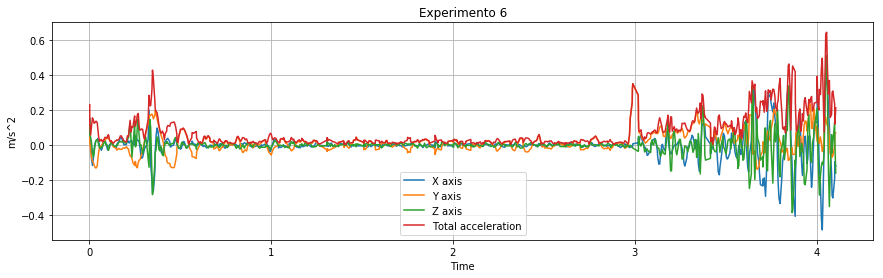

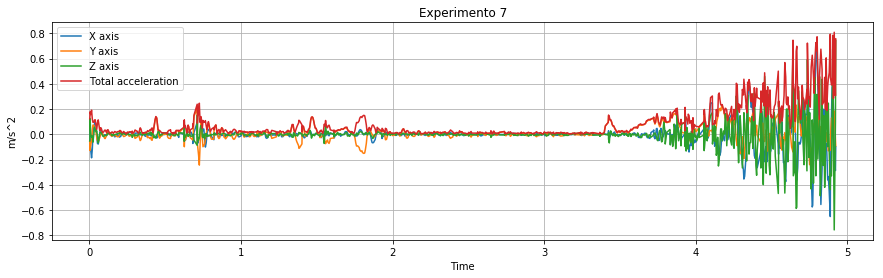

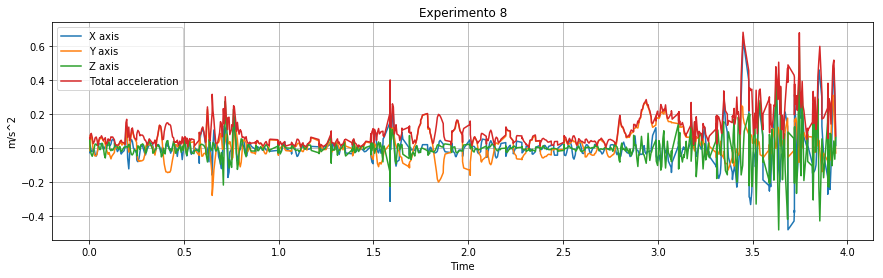

In [72]:
# Pontos de final encontrados manualmente
end = [630,520,800,800,1000,800,1000,800]


i=0
for tbl in tbls:
    tbl.head()
    fig = plt.figure(figsize=(50,4))
    plt.subplot(131)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("m/s^2")
    plt.plot(tbl["time"][:end[i]], tbl["ax"][:end[i]], label = "X axis")
    plt.plot(tbl["time"][:end[i]], tbl["ay"][:end[i]], label ="Y axis")
    plt.plot(tbl["time"][:end[i]], tbl["az"][:end[i]], label ="Z axis")
    plt.plot(tbl["time"][:end[i]], tbl["aT"][:end[i]], label = "Total acceleration")
    plt.title("Experimento "+str(i+1))
    plt.legend()
    plt.show()
    i+=1

## Plotando os dados usando o metodo de euler


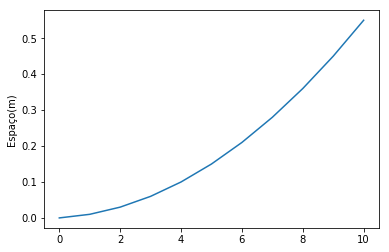

In [132]:
g = 9.7      # g no laboratório didatico do IFUSP, medido pelo IAG, em m/s^2
theta = 0.06           # inclinação da rampa, em radianos
at = g*math.sin(theta) # aceleração teorica no plano inclinado
t0 = 0
v0 = 0
s0 = 0
dt = 0.1


for t in euler_tbls: #itera todas as tabelas
    tVals = []
    sVals = []
    
    
    S = initState(s0, v0, t0)
    last = len(t["time"])-1
    tf = 1
    while(S[2] < tf):
        S = nextState(S, a, dt)
        tVals.append(S[2])
        sVals.append(S[0])
plt.plot(sVals)
plt.ylabel("Espaço(m)")
plt.show()
        
        

## Verificação

## Interpretação

# Considerações Finais


## Crítica

   Ao fim desses experimentos, aprendemos ainda mais sobre o dia-a-dia de um cientista de dados. Aprendemos sobre como tomar precauções para que influências externas não enviesem os dados, e também aprendemos da pior maneira que deve-se sempre checar seus dados antecipadamente, e julgar a necessidade de se refazer os experimentos.
   
   Nosso problema mais aparente foi no experimento do movimento em um plano inclinado, onde a inclinação muito pequena,  as irregularidades presentes na rampa, e a falta de amortecimento do carrinho criaram um cenário onde nosso sensor foi incapaz de captar a aceleração exercida pela gravidade de maneira que fosse possível diferenciá-la do ruído também captado. Isso fez com que nossos dados fossem inutilizáveis.
   
   No movimento pendular, devido à alta sensibilidade do experimento as suas condições iniciais, também tivemos dificuldades em tirar conclusões gerais sobre seu comportamento. Realizações diferentes do movimento resultaram em curvas amplitudes semelhantes mas períodos fora de sincronia, diferença essa que se amplia com o número de oscilações do pendulo.
   
   Compreendemos como utilizar ferramentas relativas a e-science como Jupyer, Pandas e matplotlib (ambas bibliotecas de Python voltadas a ciência de dados) e a interpretar resultados de um acelrômetro.
    
   O experimento foi muito interessante para uma introdução ao método cientifico de forma prática

## Log

 * Coleta de dados (Pêndulo) : 8 horas
 * Coleta de dados (Movimento Circular) : 3 horas
 * Coleta de dados (Rampa) : 3 horas
 * Análise de dados : 17 horas
 * Edição de vídeo : 15 horas

## Contribuição dos autores

Leandro Rodrigues editou o vídeo referente ao experimento, Thiago Teixeira e Caio fontes geraram os gráficos de MUV e MU (acelerômetro e dados manuais), Caio Fontes e Caio Andrade redigiram o relatório e executaram a análise dos dados.Caio Fontes, Caio Andrade e Thiago Teixeira foram o alvo do experimento do MU e MUV. Todos os autores se revezaram para gravar o vídeo do experimento. Todos os autores leram e aprovaram este relatório. Todos os autores se revezaram para anotar os dados dos cronometros manualmente.

## Link do vídeo

https://youtu.be/_E6_dLCoTiY